## <a name="project_description_goals"></a>Project Description/Goals:

Bank Dataset Analysis
 - This project is about identifying characteristics for marketing analysis for individuals in banking clientele.

### Business understanding
Project Goal
- The goal for this project is to answer initial questions, and analyze the characteristics for banking clientele for marketing purposes. Business goals include which demographic of individuals to create marking improvements on.

### Data understanding
The banking dataset analysis data was obtained from Kaggle open-source dataset. It is stored in a csv file, named as "test.csv" and "train.cvs". It has 17 columns called features, including 45211 and 4521 row numbers. The fetures are age, job, marital, education, default, balance, housing, loan, contact, day, month, duration, campaign, pdays, previous, poutcome and y. 

### Description
A Portuguese bank is experiencing declining revenue, attributed to inadequate customer investments in long-term deposits. To address this issue, the bank aims to identify potential existing customers with a high likelihood of subscribing to long-term deposits and concentrate marketing efforts on this target group.

The banking dataset for analysis is derived from a direct marketing campaign conducted by a Portuguese bank institution. 

This campaign primarily involves making phone calls to clients to encourage them to accept long-term deposits with the bank.

After each call, clients are categorized as either "no" if they did not make a deposit or "yes" if they accepted to make a deposit.

The project's objective is to predict whether a client will agree to a term deposit during a call based on client information.



## <a name="initial_questions"></a>Initial Questions:

- What job types are customers likely to subscribe term deposit?
- What type of customer marital status are more likely to subscribe term deposit?
- Does customer education level has any effect to subscription of term deposit?
- What is the relationship between customers housing and subscription to term deposit?
- What is the relationship between customer loans and subscription to term deposit?
- What was the most effective method used to contact customers?



# Banking Dataset Analysis
Prepared By Patrick Amwayi September 2023
<hr style="border-top: 50px groove purple; margin-top: 1px; margin-bottom: 1px"></hr>

In [1]:
# imports
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

import env
import wrangle

<hr style="border-top: 10px groove purple; margin-top: 1px; margin-bottom: 1px"></hr>

## I. Acquire Data

In [2]:
# Acquiring the data from the csv file and from wrangle.py
df=wrangle.prepare_bank()

## II. Exploratory Data Analysis

### 1.What job types are customers likely to subscribe term deposit?

In [3]:
#df=wrangle.graph_0()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'entrepreneur'),
  Text(1, 0, 'technician'),
  Text(2, 0, 'services'),
  Text(3, 0, 'blue-collar'),
  Text(4, 0, 'admin.'),
  Text(5, 0, 'self-employed'),
  Text(6, 0, 'management'),
  Text(7, 0, 'housemaid'),
  Text(8, 0, 'retired'),
  Text(9, 0, 'unemployed'),
  Text(10, 0, 'student'),
  Text(11, 0, 'unknown')])

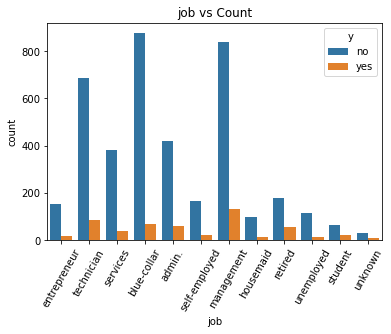

In [8]:
#visualization of occupation by count
sns.countplot(x="job", data = df, hue ="y")
#print(df["job"].value_counts())
plt.title("job vs Count")
plt.xticks(rotation=60)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'management'),
  Text(1, 0, 'blue-collar'),
  Text(2, 0, 'technician'),
  Text(3, 0, 'admin.'),
  Text(4, 0, 'services'),
  Text(5, 0, 'retired'),
  Text(6, 0, 'self-employed'),
  Text(7, 0, 'entrepreneur'),
  Text(8, 0, 'unemployed'),
  Text(9, 0, 'housemaid'),
  Text(10, 0, 'student'),
  Text(11, 0, 'unknown')])

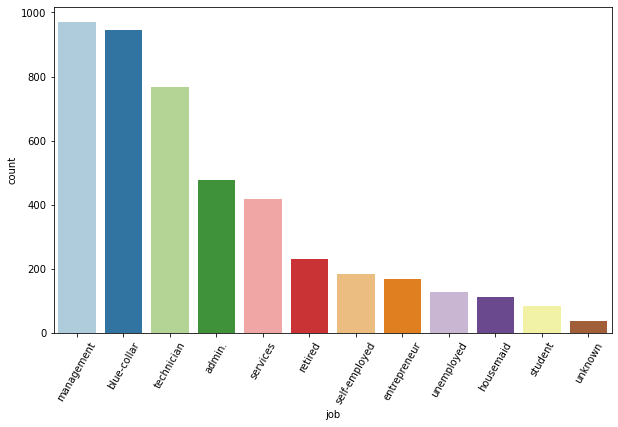

In [11]:
# Visualization of occupation in a discending order
plt.figure(figsize=(10,6))
sns.countplot(x = 'job',
              data = df, 
              order = df['job'].value_counts().index, palette=sns.color_palette('Paired'))
plt.xticks(rotation=60)

### Findings
- Management, blue-collar, technician are the top 3 jobs for banking customers

### 2.What type of customer marital status are more likely to subscribe term deposit?

married     2797
single      1196
divorced     528
Name: marital, dtype: int64


Text(0.5, 1.0, 'Martial Status vs Count')

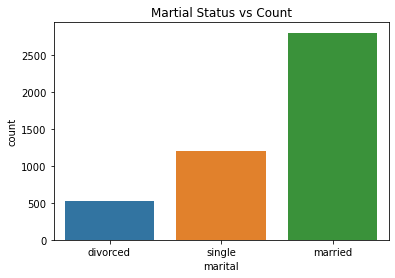

In [12]:
# visualization of marital status by count
sns.countplot(x="marital", data = df)
print(df["marital"].value_counts())
plt.title("Martial Status vs Count")

### Findings
- Most of the customers that are married have invested more in deposits than are single and divorced
- A huge number of the customers are married.

### 3.Does customer education level has any effect to subscription of term deposit?

Text(0.5, 1.0, 'Education type vs Count')

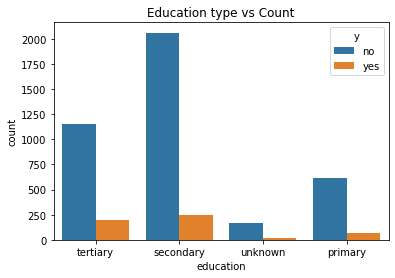

In [13]:
# visualization of education type by count
sns.countplot(x="education",data=df, hue = "y")
plt.title("Education type vs Count")

secondary    2306
tertiary     1350
primary       678
unknown       187
Name: education, dtype: int64


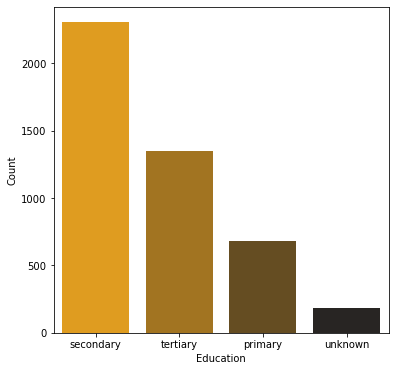

In [14]:
# Visualization of education in a discending order
plt.figure(figsize=(6,6))
sns.countplot(x ='education',
              data=df,
              order=df['education'].value_counts().index,palette='dark:orange_r')
plt.xlabel('Education')
plt.ylabel('Count')
print(df["education"].value_counts())

### Findings
- Large number of customer base have secondary education meaning that they have more term deposit sold to than the clients with tertiary and primary education levels.

### 4.What is the relationship between customers housing and subscription to term deposit?

yes    2559
no     1962
Name: housing, dtype: int64


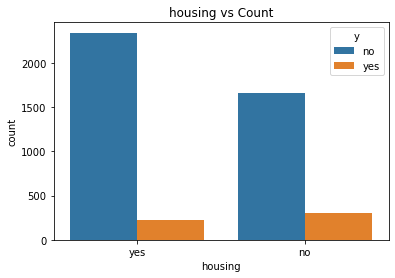

In [15]:
#visualization of housing by count
sns.countplot(x="housing", data = df, hue ="y")
plt.title("housing vs Count")
print(df["housing"].value_counts())

### Findings
- There is a higher proportion of customers with a housing loan. 

### 5. What is the relationship between customer loans and subscription to term deposit?

Text(0.5, 1.0, 'loan vs Count')

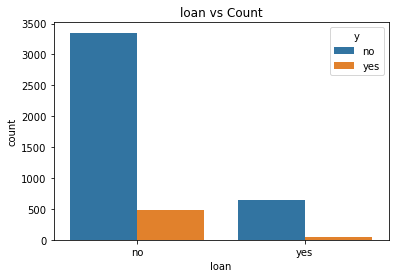

In [17]:
#visualization of loan by count
sns.countplot(x="loan", data = df, hue ="y")
plt.title("loan vs Count")

### Findings
- A large number of customers are without personal loan, very few people decided to get personal loans 

### 6. What was the most effective method used to contact customers?

cellular     2896
unknown      1324
telephone     301
Name: contact, dtype: int64


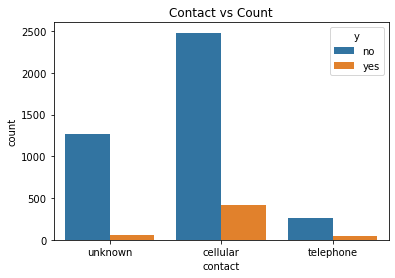

In [18]:
#visualiaztion of contract by count
sns.countplot(x="contact", data = df, hue ="y")
plt.title("Contact vs Count")
print(df["contact"].value_counts())

### Findings
- In the above graph shows that customers who were contacted by cellular got more to a deposit term as compared to clients who were contacted by telephone and other unkown means.
- Cell-phones seem to be the most favoured method of contacting customers

## Heatmap

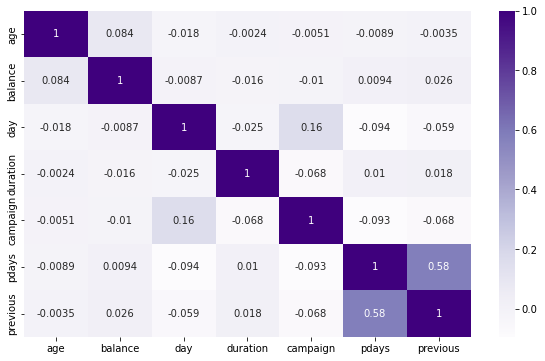

In [19]:
#checking correlation between variables.
correlation_matrix = df.corr()
plt.figure(figsize = (10,6))
sns.heatmap(correlation_matrix, annot = True,cmap='Purples')
plt.show()

### Findings
- Here, I analyzed 7 factcors using correlation matrix. The studied factors include age, balance, day, duration, campaign, pdays and previous.
- Result: Of all these factors, 3 factors (age, balance and day) show a relative strong correlation than the rest.

## Conclusion:

A summary of the results of the analysis :

- Students, housemaids and unemployed people are likely to subscribe to term deposit, on the other management,blue-coller and technician are less likely to sunscribe to term deposit.
- Married people are less likely to sunscribe to term deposit, on the other hand single and divorced people are more likely to subscribe to term depoit.
- Education seem to have effect on subscription to term deposit, people with secondary education are more likely to subscribe to term deposit unlike people with tertiary and primary education